In [105]:
import matplotlib.pyplot as plt
import math


In [106]:
class BuddySystem:
    """Simulates the Buddy System for memory allocation."""
    def __init__(self, total_size: int):
        self.total_size = total_size
        self.free_blocks = {total_size: [0]}  # Dictionary {block_size: [start_addresses]}
        self.allocated_blocks = {}  # Stores {start_address: block_size}

    def allocate(self, size: int):
        """Allocates a block of memory using the Buddy System."""
        block_size = self._next_power_of_2(size)
        
        available_size = next((s for s in sorted(self.free_blocks) if s >= block_size and self.free_blocks[s]), None)
        if available_size is None:
            raise MemoryError("Not enough memory available.")
        
        start_address = self.free_blocks[available_size].pop(0)
        if not self.free_blocks[available_size]:
            del self.free_blocks[available_size]
        
        while available_size > block_size:
            available_size //= 2
            self.free_blocks.setdefault(available_size, []).append(start_address + available_size)
        
        self.allocated_blocks[start_address] = block_size
        return start_address

    def free(self, start_address: int):
        """Deallocates a block of memory and merges buddies if possible."""
        if start_address not in self.allocated_blocks:
            raise ValueError("Invalid address: No allocated block found.")
        
        print(f"Freeing block at {start_address}")
        
        block_size = self.allocated_blocks.pop(start_address)
        
        while True:
            buddy_address = start_address ^ block_size
            if buddy_address in self.free_blocks.get(block_size, []):
                self.free_blocks[block_size].remove(buddy_address)
                start_address = min(start_address, buddy_address)
                block_size *= 2
            else:
                self.free_blocks.setdefault(block_size, []).append(start_address)
                break

    def _next_power_of_2(self, n: int):
        return 2 ** math.ceil(math.log2(n))

    def display_memory(self):
        """Displays the current state of allocated and free memory blocks."""
        print("Allocated Blocks:")
        for addr, size in sorted(self.allocated_blocks.items()):
            print(f"Address {addr}: {size} bytes")
        print("\nFree Blocks (Size: Address):")
        for size, addresses in sorted(self.free_blocks.items()):
            print(f"Size {size}: {addresses}")

    def visualize_memory(self):
        """Visualizes memory allocation with a bar chart."""
        memory_map = ["Free"] * self.total_size
        for addr, size in self.allocated_blocks.items():
            for i in range(size):
                memory_map[addr + i] = "Allocated"
        
        plt.figure(figsize=(10, 2))
        colors = ["red" if cell == "Allocated" else "green" for cell in memory_map]
        plt.bar(range(self.total_size), [1] * self.total_size, color=colors, edgecolor="black")
        plt.title("Buddy System")
        plt.xlabel("Memory Address")
        plt.ylabel("(RED=Occupied, GREEN=Free)")
        plt.show()

In [107]:
buddy_system = BuddySystem(32)

Allocated Blocks:
Address 0: 4 bytes

Free Blocks (Size: Address):
Size 4: [4]
Size 8: [8]
Size 16: [16]


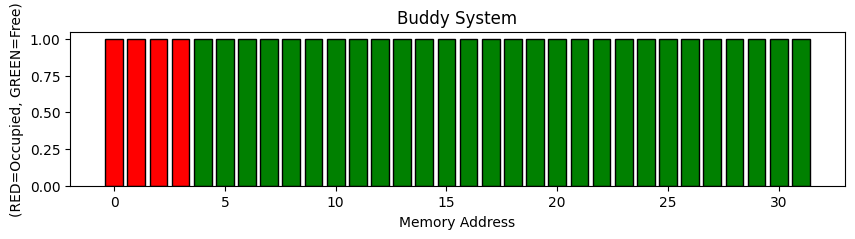

Not enough memory available.


In [108]:
try:
        addr1 = buddy_system.allocate(3)
        buddy_system.display_memory()
        buddy_system.visualize_memory()
        addr2 = buddy_system.allocate(20)
        buddy_system.display_memory()
        buddy_system.visualize_memory()        
except MemoryError as e:
    print(e)

Allocated Blocks:
Address 0: 4 bytes
Address 4: 4 bytes

Free Blocks (Size: Address):
Size 8: [8]
Size 16: [16]


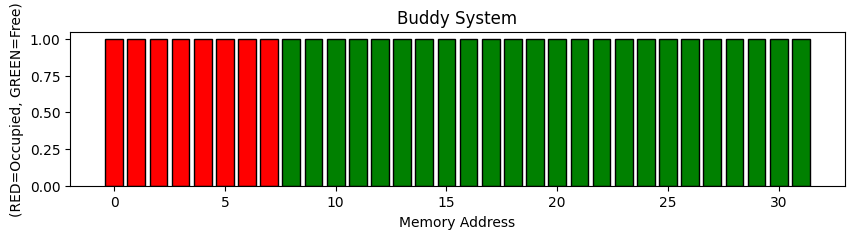

In [109]:
addr3 = buddy_system.allocate(3)
buddy_system.display_memory()
buddy_system.visualize_memory()

Freeing block at 4
Allocated Blocks:
Address 0: 4 bytes

Free Blocks (Size: Address):
Size 4: [4]
Size 8: [8]
Size 16: [16]


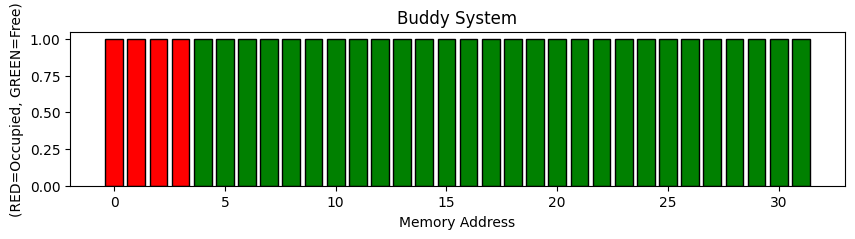

In [110]:
buddy_system.free(addr3)
buddy_system.display_memory()
buddy_system.visualize_memory()

Freeing block at 0
Allocated Blocks:

Free Blocks (Size: Address):
Size 4: []
Size 8: []
Size 16: []
Size 32: [0]


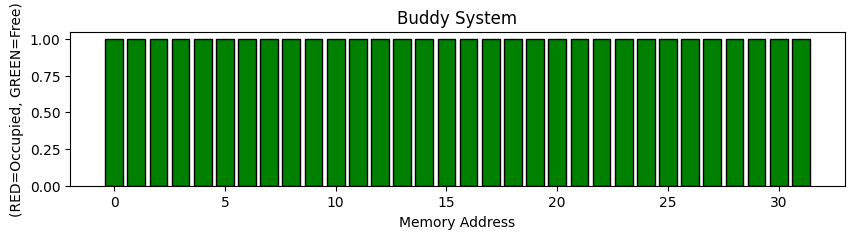

In [111]:
buddy_system.free(addr1)
buddy_system.display_memory()
buddy_system.visualize_memory()